In [1]:
#%config Completer.use_jedi = False
#%matplotlib inline

# 1. Tensorflow 설치 및 데이터 사전 준비

In [2]:
#pip install tensorflow
#pip show tensorflow
#wget -cq https://ti.arc.nasa.gov/c/5 -O nasa.zip
#unzip -qqo naza.zip -d battery_data

# 2. 데이터 확인

## 2-1. 필요 라이브러리 설치

In [1]:
import os
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.getcwd())

C:\Users\SSAFY\b4u


## 2-2. 데이터 로드 함수

In [3]:
def load_data(nm,battery): # Example of input load_data('B0006.mat','B0006')
    mat = loadmat(nm)
    print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
    counter = 0
    dataset = []
    capacity_data = []
    
    for i in range(len(mat[battery][0, 0]['cycle'][0])):
        row = mat[battery][0, 0]['cycle'][0, i]
        if row['type'][0] == 'discharge':
            ambient_temperature = row['ambient_temperature'][0][0]
            date_time = datetime.datetime(int(row['time'][0][0]),
                                          int(row['time'][0][1]),
                                          int(row['time'][0][2]),
                                          int(row['time'][0][3]),
                                          int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
            data = row['data']
            capacity = data[0][0]['Capacity'][0][0]
            for j in range(len(data[0][0]['Voltage_measured'][0])):
                voltage_measured = data[0][0]['Voltage_measured'][0][j]
                current_measured = data[0][0]['Current_measured'][0][j]
                temperature_measured = data[0][0]['Temperature_measured'][0][j]
                current_load = data[0][0]['Current_load'][0][j]
                voltage_load = data[0][0]['Voltage_load'][0][j]
                time = data[0][0]['Time'][0][j]
                dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                                voltage_measured, current_measured,
                                temperature_measured, current_load,
                                voltage_load, time])
            capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
            counter = counter + 1
    print(dataset[0])
    return [pd.DataFrame(data=dataset,
                         columns=['cycle', 'ambient_temperature', 'datetime',
                                  'capacity', 'voltage_measured',
                                  'current_measured', 'temperature_measured',
                                  'current_load', 'voltage_load', 'time']),
            pd.DataFrame(data=capacity_data,
                         columns=['cycle', 'ambient_temperature', 'datetime',
                                  'capacity'])]

In [4]:
mat = loadmat('./data/nasa_mat/B0005.mat')

In [5]:
dataset, capacity = load_data('./data/nasa_mat/B0005.mat','B0005')

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


## 2-3.Discharge 데이터 확인

In [6]:
pd.set_option('display.max_columns', 100)

In [7]:
dataset.head(200)

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...
195,1,24,2008-04-02 15:25:41,1.856487,3.273207,-0.000388,34.490078,-0.0006,0.000,3669.875
196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.000,3690.234
197,2,24,2008-04-02 19:43:48,1.846327,4.189773,0.000021,24.697752,-0.0006,0.000,0.000
198,2,24,2008-04-02 19:43:48,1.846327,4.188881,-0.000879,24.685948,-0.0006,4.204,16.672


In [8]:
capacity.head(200)

,cycle,ambient_temperature,datetime,capacity
0,1,24,2008-04-02 15:25:41,1.856487
1,2,24,2008-04-02 19:43:48,1.846327
2,3,24,2008-04-03 00:01:06,1.835349
3,4,24,2008-04-03 04:16:37,1.835263
4,5,24,2008-04-03 08:33:25,1.834646
...,...,...,...,...
163,164,24,2008-05-26 10:44:38,1.293464
164,165,24,2008-05-26 15:30:43,1.288003
165,166,24,2008-05-26 20:21:04,1.287453
166,167,24,2008-05-27 15:52:41,1.309015


In [9]:
dataset.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924
std,45.699687,0.0,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295
min,1.000000,24.0,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000
25%,50.000000,24.0,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000
50%,88.000000,24.0,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000
75%,127.000000,24.0,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000
max,168.000000,24.0,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000


# 3. EDA 분석

### 3-1. Cycle, Capacity 그래프

Text(0.5, 1.0, 'Discharge B0005')

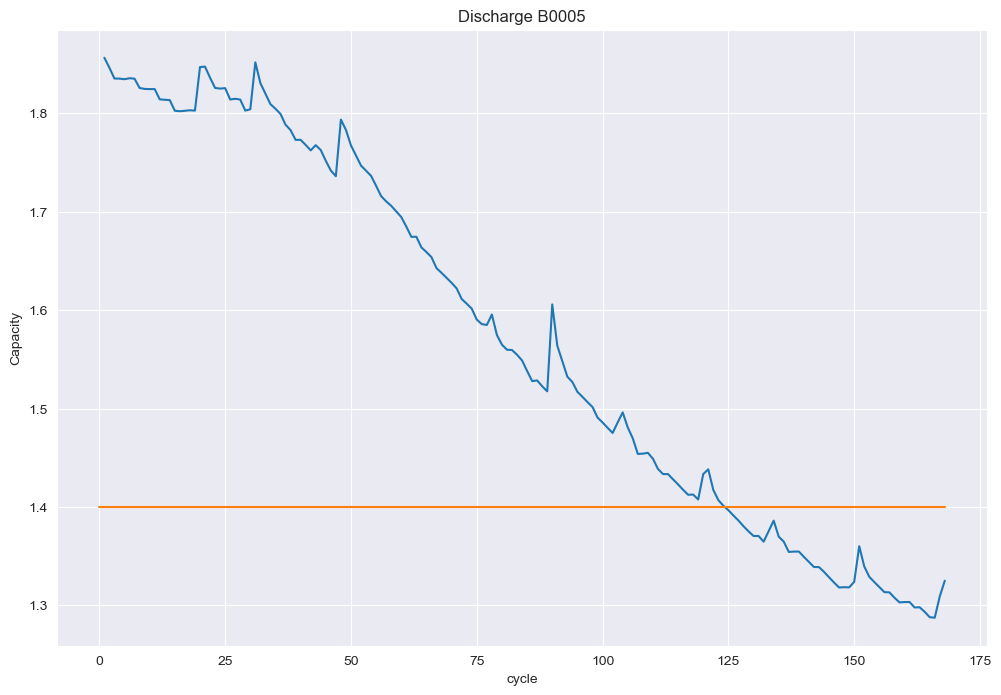

In [10]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

### 3-2. Cycle, SoH 그래프

In [11]:
# 데이터 SoH(현재 수용량 / 최초 수용량)
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.856487  1.000000
1      2 2008-04-02 19:43:48  1.846327  0.994527
2      3 2008-04-03 00:01:06  1.835349  0.988614
3      4 2008-04-03 04:16:37  1.835263  0.988567
4      5 2008-04-03 08:33:25  1.834646  0.988235


Text(0.5, 1.0, 'Discharge B0005')

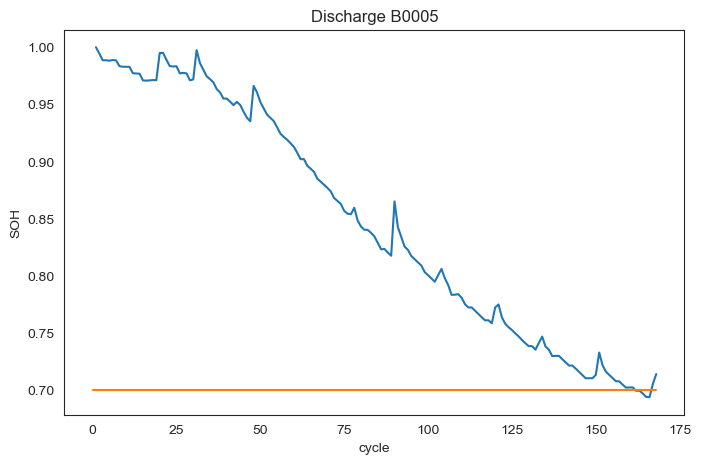

In [12]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

### 3-3. Train Dataset 생성

In [13]:
C = dataset['capacity'][0]
soh = []
for i in range(len(dataset)):
    soh.append([dataset['capacity'][i] / C])
soh = pd.DataFrame(data=soh, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset = dataset[attribs]

In [14]:
sc = MinMaxScaler(feature_range=(0,1))
train_dataset = sc.fit_transform(train_dataset)

In [15]:
print(train_dataset.shape)
print(soh.shape)

(50285, 7)
(50285, 1)


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [17]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=train_dataset.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1))
model.summary()
model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x=train_dataset, y=soh.to_numpy(), batch_size=25, epochs=50)

Epoch 1/50
2012/2012 [==============================] - 3s 1ms/step - loss: 0.1057
Epoch 2/50
2012/2012 [==============================] - 2s 1ms/step - loss: 0.0237
Epoch 3/50
2012/2012 [==============================] - 2s 1ms/step - loss: 0.0229
Epoch 4/50
2012/2012 [==============================] - 3s 1ms/step - loss: 0.0228
Epoch 5/50
2012/2012 [==============================] - 2s 1ms/step - loss: 0.0227
Epoch 6/50
2012/2012 [==============================] - 2s 1ms/step - loss: 0.0225
Epoch 7/50
2012/2012 [==============================] - 2s 1ms/step - loss: 0.0225
Epoch 8/50
2012/2012 [==============================] - 2s 1ms/step - loss: 0.0226
Epoch 9/50
2012/2012 [==============================] - 2s 997us/step - loss: 0.0224
Epoch 10/50
2012/2012 [==============================] - 2s 1ms/step - loss: 0.0223
Epoch 11/50
2012/2012 [==============================] - 2s 1ms/step - loss: 0.0223
Epoch 12/50
2012/2012 [==============================] - 2s 1ms/step - loss: 0.0221

In [19]:
dataset_val, capacity_val = load_data('./data/nasa_mat/B0006.mat','B0006')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity']) / C
print(dataset_val.head(5))
print(dis_ele.head(5))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 2.035337591005598, 4.179799607333447, -0.0023663271409738672, 24.277567510331888, -0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  2.035338          4.179800   
1      1                   24 2008-04-02 15:25:41  2.035338          4.179823   
2      1                   24 2008-04-02 15:25:41  2.035338          3.966528   
3      1                   24 2008-04-02 15:25:41  2.035338          3.945886   
4      1                   24 2008-04-02 15:25:41  2.035338          3.930354   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.002366             24.277568       -0.0006         0.000   0.000  
1          0.000434             24.277073       -0.0006         4.195  16.781  
2         -2.014242             24.366226       -1.9990         3.070  35.703  
3         -2.

In [20]:
attrib=['capacity', 'voltage_measured', 'current_measured',
        'temperature_measured', 'current_load', 'voltage_load', 'time']
soh_pred = model.predict(sc.fit_transform(dataset_val[attrib]))
print(soh_pred.shape)

C = dataset_val['capacity'][0]
soh = []
for i in range(len(dataset_val)):
  soh.append(dataset_val['capacity'][i] / C)
new_soh = dataset_val.loc[(dataset_val['cycle'] >= 1), ['cycle']]
new_soh['SoH'] =  soh
new_soh['NewSoH'] = soh_pred
new_soh = new_soh.groupby(['cycle']).mean().reset_index()
print(new_soh.head(10))
rms = np.sqrt(mean_squared_error(new_soh['SoH'], new_soh['NewSoH']))
print('Root Mean Square Error: ', rms)

1572/1572 [==============================] - 1s 802us/step
(50285, 1)
   cycle       SoH    NewSoH
0      1  1.000000  0.961156
1      2  0.994990  0.958482
2      3  0.989185  0.955364
3      4  0.989165  0.955334
4      5  0.982898  0.952013
5      6  0.989467  0.955494
6      7  0.989075  0.955306
7      8  0.967304  0.943589
8      9  0.966997  0.943408
9     10  0.961625  0.940523
Root Mean Square Error:  0.0904584891331725


Text(0.5, 1.0, 'Discharge B0006')

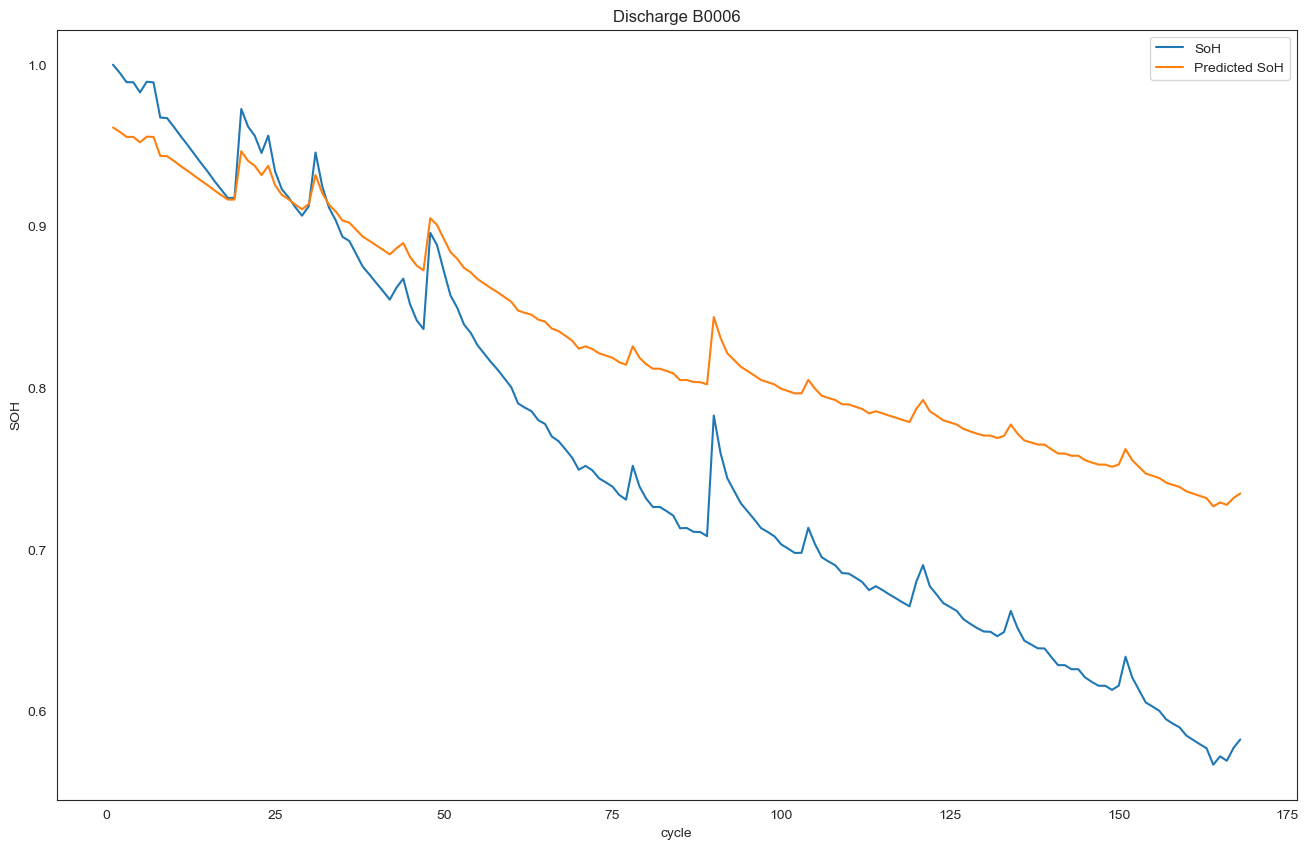

In [21]:
plot_df = new_soh.loc[(new_soh['cycle']>=1),['cycle','SoH', 'NewSoH']]
sns.set_style("white")
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['SoH'], label='SoH')
plt.plot(plot_df['cycle'], plot_df['NewSoH'], label='Predicted SoH')
#Draw threshold
#plt.plot([0.,len(capacity)], [0.70, 0.70], label='Threshold')
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0006')

## RUL 추정

SoH 추정을 위해 수행된 것과 동일한 방식으로 훈련 및 테스트 데이터 세트가 준비되며, 이 특별한 경우 배터리 용량 데이터는 배터리 임계값에 도달하는 시점을 알고 배터리 수명이 다할 때까지 남은 주기를 예측할 수 있는 방식으로 다음 주기의 용량을 예측하기 위해 처음 50주기의 첫 번째 데이터를 사용하여 사용됩니다.

In [22]:
dataset_val

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,2.035338,4.179800,-0.002366,24.277568,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,2.035338,4.179823,0.000434,24.277073,-0.0006,4.195,16.781
2,1,24,2008-04-02 15:25:41,2.035338,3.966528,-2.014242,24.366226,-1.9990,3.070,35.703
3,1,24,2008-04-02 15:25:41,2.035338,3.945886,-2.008730,24.515123,-1.9990,3.045,53.781
4,1,24,2008-04-02 15:25:41,2.035338,3.930354,-2.013381,24.676053,-1.9990,3.026,71.922
...,...,...,...,...,...,...,...,...,...,...
50280,168,24,2008-05-27 20:45:42,1.185675,3.689577,-0.001671,32.367946,0.0006,0.000,2781.312
50281,168,24,2008-05-27 20:45:42,1.185675,3.690020,-0.001914,32.464485,0.0006,0.000,2791.062
50282,168,24,2008-05-27 20:45:42,1.185675,3.690708,-0.002706,32.337187,0.0006,0.000,2800.828
50283,168,24,2008-05-27 20:45:42,1.185675,3.691356,-0.002952,32.252598,0.0006,0.000,2810.640


In [23]:
capacity_val

,cycle,ambient_temperature,datetime,capacity
0,1,24,2008-04-02 15:25:41,2.035338
1,2,24,2008-04-02 19:43:48,2.025140
2,3,24,2008-04-03 00:01:06,2.013326
3,4,24,2008-04-03 04:16:37,2.013285
4,5,24,2008-04-03 08:33:25,2.000528
...,...,...,...,...
163,164,24,2008-05-26 10:44:38,1.153818
164,165,24,2008-05-26 15:30:43,1.164401
165,166,24,2008-05-26 20:21:04,1.158797
166,167,24,2008-05-27 15:52:41,1.174975


In [24]:
dataset_val, capacity_val = load_data('./data/nasa_mat/B0005.mat','B0005')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
rows=['cycle','capacity']
dataset=dis_ele[rows]
data_train=dataset[(dataset['cycle']<50)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=50)]
data_set_test=data_test.iloc[:,1:2].values

sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
#take the last 10t to predict 10t+1
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


In [25]:
regress = Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200))
regress.add(Dropout(0.3))
regress.add(Dense(units=1))
regress.compile(optimizer='adam',loss='mean_squared_error')
regress.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 200)           161600    
                                                                 
 dropout_1 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 200)           320800    
                                                                 
 dropout_2 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 200)           320800    
                                                                 
 dropout_3 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_3 (LSTM)               (None, 200)              

In [26]:
regress.fit(X_train,y_train,epochs=200,batch_size=25)

Epoch 1/200
2/2 [==============================] - 6s 54ms/step - loss: 0.3052
Epoch 2/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0932
Epoch 3/200
2/2 [==============================] - 0s 41ms/step - loss: 0.2128
Epoch 4/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0483
Epoch 5/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1021
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 0.1052
Epoch 7/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0756
Epoch 8/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0488
Epoch 9/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0520
Epoch 10/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0718
Epoch 11/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0479
Epoch 12/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0446
Epoch 13/200
2/2 [==============================]

In [27]:
print(len(data_test))
data_total=pd.concat((data_train['capacity'], data_test['capacity']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

119


In [28]:
X_test=[]
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=regress.predict(X_test)
print(pred.shape)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)
metrics.r2_score(tests,pred)

4/4 [==============================] - 1s 17ms/step
(119, 1)
Test RMSE: 0.094


0.5164700058223068

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14044\1198164500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['pre']=pred


Text(0.5, 1.0, 'Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

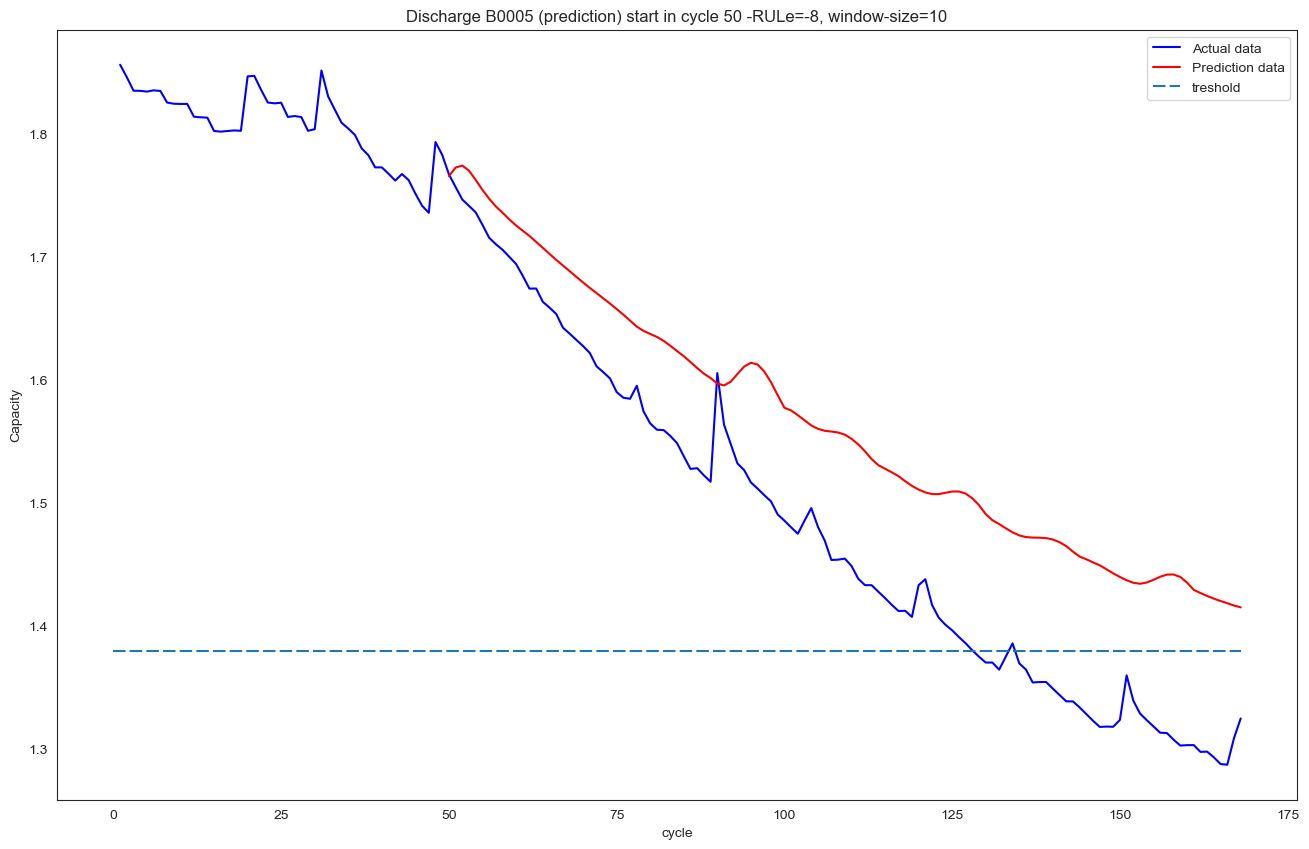

In [29]:
ln = len(data_train)
data_test['pre']=pred
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','capacity']]
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0005 (prediction) start in cycle 50 -RULe=-8, window-size=10')

In [30]:
plot_df

,cycle,capacity
0,1,1.856487
1,2,1.846327
2,3,1.835349
3,4,1.835263
4,5,1.834646
...,...,...
163,164,1.293464
164,165,1.288003
165,166,1.287453
166,167,1.309015


In [31]:
plot_per

,cycle,pre
49,50,1.765924
50,51,1.772938
51,52,1.774488
52,53,1.770309
53,54,1.762740
...,...,...
163,164,1.422438
164,165,1.420528
165,166,1.418739
166,167,1.416851


In [32]:
# 데이터 SoH(현재 수용량 / 최초 수용량)
C = 1.856487

In [33]:
for i in range(len(plot_per)):
    plot_per['SoH']=(plot_per['pre'])/C

In [34]:
plot_per

,cycle,pre,SoH
49,50,1.765924,0.951218
50,51,1.772938,0.954996
51,52,1.774488,0.955831
52,53,1.770309,0.953580
53,54,1.762740,0.949503
...,...,...,...
163,164,1.422438,0.766199
164,165,1.420528,0.765170
165,166,1.418739,0.764206
166,167,1.416851,0.763189


In [36]:
# SoH 컬럼 명을 prediction으로 변경
plot_per = plot_per.rename(columns={'SoH': 'prediction'})

# created_at 컬럼 추가 및 값 설정
plot_per['created_at'] = '2023-05-16 10:23:00'

# id 컬럼 생성 및 값 설정
plot_per.insert(0, 'id', 1)

# 컬럼 순서 변경
plot_per = plot_per[['id', 'cycle', 'prediction', 'created_at']]

In [37]:
plot_per

,id,cycle,prediction,created_at
49,1,50,0.951218,2023-05-16 10:23:00
50,1,51,0.954996,2023-05-16 10:23:00
51,1,52,0.955831,2023-05-16 10:23:00
52,1,53,0.953580,2023-05-16 10:23:00
53,1,54,0.949503,2023-05-16 10:23:00
...,...,...,...,...
163,1,164,0.766199,2023-05-16 10:23:00
164,1,165,0.765170,2023-05-16 10:23:00
165,1,166,0.764206,2023-05-16 10:23:00
166,1,167,0.763189,2023-05-16 10:23:00


In [38]:
plot_per.to_csv('soh_log_50.csv', index=False)

In [35]:
pred=0
Afil=0
Pfil=0
a=data_test['capacity'].values
b=data_test['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("The Actual fail at cycle number: "+ str(Afil+ln))
print("The prediction fail at cycle number: "+ str(Pfil+ln))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The Actual fail at cycle number: 128
The prediction fail at cycle number: 49
The error of RUL= -79 Cycle(s)
